In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
con = sqlite3.connect(r"C:\Users\nazir\Desktop\DA\spatial_DA\zomato_rawdata.sqlite") # Creating a connection to DB

In [3]:
df = pd.read_sql_query("select * from Users", con=con)
df.head()

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.isna().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [5]:
df.isna().sum()/len(df)*100

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [6]:
df.rate.replace(("New","NEW", "-"), np.nan, inplace = True) # Replacing the content of the tuple with nan in the rate column

In [7]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [8]:
type(np.nan)

float

In [9]:
df['rate'] = df.rate.apply(lambda x: float(x.split('/')[0]) if type(x) == str else x) # Applying a lambda function on the rating to selecting the actual rating. Last condition is to handle nan values. nan values are float values
df.rate

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

In [10]:
x = pd.crosstab(df.rate, df.online_order) #Two way crosstabs or pivot table
x

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


<Axes: xlabel='rate'>

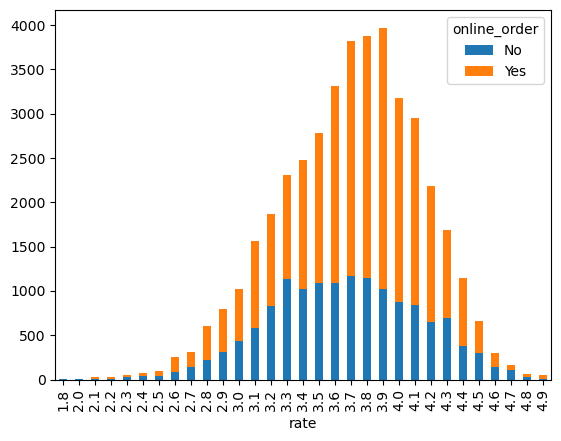

In [11]:
x.plot(kind = 'bar', stacked = True)

In [12]:
xx = x.div(x.sum(axis = 1).astype(float), axis = 0) # Dividing each value by the sum of on each row
xx

online_order,No,Yes
rate,,
1.8,1.000000,0.000000
2.0,1.000000,0.000000
2.1,0.375000,0.625000
2.2,0.384615,0.615385
2.3,0.568627,0.431373
2.4,0.514286,0.485714
2.5,0.376238,0.623762
2.6,0.319231,0.680769
2.7,0.459283,0.540717


<Axes: xlabel='rate'>

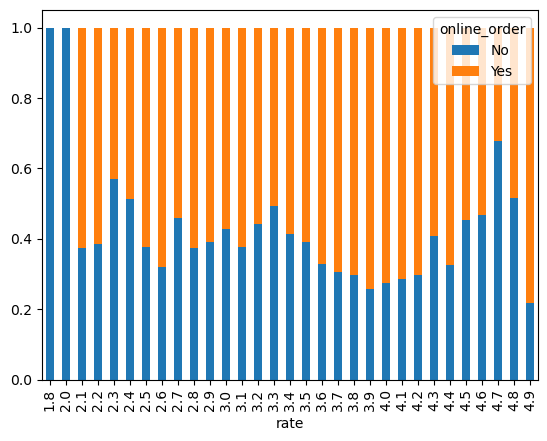

In [13]:
xx.plot(kind = 'bar', stacked = True) # ploting 100% stacked bar graph

In [14]:
df.reviews_list

0        [('Rated 4.0', 'RATED\n  A beautiful place to ...
1        [('Rated 4.0', 'RATED\n  Had been here for din...
2        [('Rated 3.0', "RATED\n  Ambience is not that ...
3        [('Rated 4.0', "RATED\n  Great food and proper...
4        [('Rated 4.0', 'RATED\n  Very good restaurant ...
                               ...                        
51712    [('Rated 5.0', "RATED\n  Food and service are ...
51713                                                   []
51714                                                   []
51715    [('Rated 4.0', 'RATED\n  Nice and friendly pla...
51716    [('Rated 5.0', 'RATED\n  Great ambience , look...
Name: reviews_list, Length: 51717, dtype: object

In [15]:
df.rest_type.isna().sum()

227

In [16]:
data =  df.dropna(subset=['rest_type'])

In [17]:
data.shape

(51490, 18)

#### Analyzing subset

In [18]:
qb_data = data[data.rest_type.str.contains('Quick Bites')]
qb_data.head()

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
23,23,https://www.zomato.com/bangalore/my-tea-house-...,"224/Y, 4th Phase, 7th Block, 100 Feet Ring Roa...",My Tea House,Yes,No,3.6,62,080 65975430\r\n+91 7337733798,Banashankari,"Quick Bites, Cafe","Pasta, Iced Tea","Italian, Fast Food, Cafe, European",600,"[('Rated 4.0', ""RATED\n So, went here with fr...",[],Cafes,Banashankari
26,26,https://www.zomato.com/bangalore/coffee-tindi-...,"27th Cross Rd, Banashankari Stage II, Banashan...",Coffee Tindi,Yes,No,3.8,75,+91 9945758046,Banashankari,"Cafe, Quick Bites",None,"Cafe, South Indian",200,"[('Rated 5.0', 'RATED\n please provide some e...",[],Cafes,Banashankari
31,31,https://www.zomato.com/bangalore/foodiction-1-...,"2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...",Foodiction,Yes,No,2.8,506,+91 9916107070,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",[],Delivery,Banashankari
34,34,https://www.zomato.com/bangalore/faasos-banash...,"80, BDA Complex, 2nd Stage, Banashankari, Bang...",Faasos,Yes,No,4.2,415,+91 7700020020,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500,"[('Rated 3.0', 'RATED\n Not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari


In [19]:
qb_data.shape

(20639, 18)

In [20]:
qb_data.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [21]:
qb_data['reviews_list'] = qb_data['reviews_list'].apply(lambda x: x.lower())
qb_data.head()

C:\Users\nazir\AppData\Local\Temp\ipykernel_12740\3533309815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qb_data['reviews_list'] = qb_data['reviews_list'].apply(lambda x: x.lower())


,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('rated 4.0', ""rated\n great food and proper...",[],Buffet,Banashankari
23,23,https://www.zomato.com/bangalore/my-tea-house-...,"224/Y, 4th Phase, 7th Block, 100 Feet Ring Roa...",My Tea House,Yes,No,3.6,62,080 65975430\r\n+91 7337733798,Banashankari,"Quick Bites, Cafe","Pasta, Iced Tea","Italian, Fast Food, Cafe, European",600,"[('rated 4.0', ""rated\n so, went here with fr...",[],Cafes,Banashankari
26,26,https://www.zomato.com/bangalore/coffee-tindi-...,"27th Cross Rd, Banashankari Stage II, Banashan...",Coffee Tindi,Yes,No,3.8,75,+91 9945758046,Banashankari,"Cafe, Quick Bites",None,"Cafe, South Indian",200,"[('rated 5.0', 'rated\n please provide some e...",[],Cafes,Banashankari
31,31,https://www.zomato.com/bangalore/foodiction-1-...,"2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...",Foodiction,Yes,No,2.8,506,+91 9916107070,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500,"[('rated 1.0', ""rated\n worst restaurant ever...",[],Delivery,Banashankari
34,34,https://www.zomato.com/bangalore/faasos-banash...,"80, BDA Complex, 2nd Stage, Banashankari, Bang...",Faasos,Yes,No,4.2,415,+91 7700020020,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500,"[('rated 3.0', 'rated\n not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari


In [22]:
qb_data[['reviews_list']]

,reviews_list
3,"[('rated 4.0', ""rated\n great food and proper..."
23,"[('rated 4.0', ""rated\n so, went here with fr..."
26,"[('rated 5.0', 'rated\n please provide some e..."
31,"[('rated 1.0', ""rated\n worst restaurant ever..."
34,"[('rated 3.0', 'rated\n not worth for the mon..."
...,...
51641,"[('rated 2.0', ""rated\n food is not upto the ..."
51642,[]
51643,[]
51644,[]


In [23]:
from nltk.corpus import RegexpTokenizer, stopwords  # Regexptokenizer uses regular expression to clean strings and tokenize the text

In [24]:
tokenizer = RegexpTokenizer("[a-zA-Z]+") # Argument of the regexptokenizer is the pattern to be considered. In this case we are considering only small and capital letter. + indicate one or more occurence of our pattern

In [25]:
# qb_data.reviews_list[3]

In [26]:
# a = tokenizer.tokenize(qb_data.reviews_list[3])
# a

In [27]:
# b = [i for i in a if len(i) >1 ]
# b

In [28]:
# import nltk
# nltk.download('stopwords')

In [29]:
sw = stopwords.words('english')
# sw

In [30]:
sw.extend(['rated', 'RATED', 'n','nan', 'x', 'Rated'])

In [31]:
# new = [i for i in a if i not in sw] # Removing stop words, repeated words,  single letters and nan
# new

In [32]:
sample = df[:10000]

In [33]:
review_tokens = sample['reviews_list'].apply(tokenizer.tokenize)
review_tokens

0       [Rated, RATED, n, A, beautiful, place, to, din...
1       [Rated, RATED, n, Had, been, here, for, dinner...
2       [Rated, RATED, n, Ambience, is, not, that, goo...
3       [Rated, RATED, n, Great, food, and, proper, Ka...
4       [Rated, RATED, n, Very, good, restaurant, in, ...
                              ...                        
9995                                                   []
9996                                                   []
9997    [Rated, RATED, n, Went, to, have, dessert, its...
9998    [Rated, RATED, n, This, restaurant, was, very,...
9999    [Rated, RATED, n, Mayuri, is, a, small, authen...
Name: reviews_list, Length: 10000, dtype: object

In [34]:
review_tokens_clean = review_tokens.apply(lambda x: [token for token in x if token not in sw]) # applying a lambda function to remove all stop words and single letters
review_tokens_clean

0       [A, beautiful, place, dine, The, interiors, ta...
1       [Had, dinner, family, Turned, good, choose, su...
2       [Ambience, good, enough, pocket, friendly, caf...
3       [Great, food, proper, Karnataka, style, full, ...
4       [Very, good, restaurant, neighbourhood, Buffet...
                              ...                        
9995                                                   []
9996                                                   []
9997    [Went, dessert, amazing, pocket, friendly, plu...
9998    [This, restaurant, good, nominal, price, nServ...
9999    [Mayuri, small, authentic, place, Andhra, food...
Name: reviews_list, Length: 10000, dtype: object

In [35]:
total_review_1D = []
for i in range(len(review_tokens_clean)):
    total_review_1D.extend(review_tokens_clean[i])
total_review_1D

['A',
 'beautiful',
 'place',
 'dine',
 'The',
 'interiors',
 'take',
 'back',
 'Mughal',
 'era',
 'The',
 'lightings',
 'perfect',
 'We',
 'went',
 'occasion',
 'Christmas',
 'limited',
 'items',
 'available',
 'But',
 'taste',
 'service',
 'compromised',
 'The',
 'complaint',
 'breads',
 'could',
 'better',
 'Would',
 'surely',
 'like',
 'come',
 'I',
 'dinner',
 'family',
 'weekday',
 'The',
 'restaurant',
 'completely',
 'empty',
 'Ambience',
 'good',
 'good',
 'old',
 'hindi',
 'music',
 'Seating',
 'arrangement',
 'good',
 'We',
 'ordered',
 'masala',
 'papad',
 'panner',
 'baby',
 'corn',
 'starters',
 'lemon',
 'corrionder',
 'soup',
 'butter',
 'roti',
 'olive',
 'chilli',
 'paratha',
 'Food',
 'fresh',
 'good',
 'service',
 'good',
 'Good',
 'family',
 'hangout',
 'nCheers',
 'Its',
 'restaurant',
 'near',
 'Banashankari',
 'BDA',
 'Me',
 'along',
 'office',
 'friends',
 'visited',
 'buffet',
 'unfortunately',
 'provide',
 'veg',
 'buffet',
 'On',
 'inquiring',
 'said',
 'pla

In [36]:
from collections import Counter

In [37]:
p = Counter(total_review_1D).most_common(10)
p

[('place', 139366),
 ('I', 138827),
 ('good', 134735),
 ('food', 127124),
 ('The', 98027),
 ('chicken', 47262),
 ('service', 41358),
 ('taste', 40322),
 ('ordered', 39995),
 ('great', 34467)]

##### Alternative to using counter

In [38]:
from nltk import FreqDist # FreqDist is like a dictionary. You can items to it using a key value pair

In [39]:
fd = FreqDist()

In [40]:
for word in total_review_1D:
    fd[word] += 1  # fd[word] = fd[word] + 1

In [41]:
fd.most_common(20)

[('place', 139366),
 ('I', 138827),
 ('good', 134735),
 ('food', 127124),
 ('The', 98027),
 ('chicken', 47262),
 ('service', 41358),
 ('taste', 40322),
 ('ordered', 39995),
 ('great', 34467),
 ('really', 34063),
 ('time', 33261),
 ('try', 32507),
 ('one', 32234),
 ('ambience', 31716),
 ('like', 30810),
 ('also', 30754),
 ('It', 30618),
 ('visit', 27358),
 ('restaurant', 26574)]

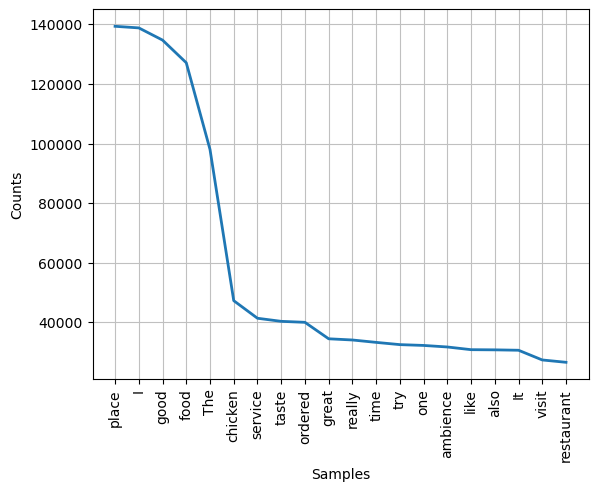

<Axes: xlabel='Samples', ylabel='Counts'>

In [42]:
### Unigram of most used words
fd.plot(20)

#### Bigram and trigram analysis

In [43]:
from nltk import FreqDist, bigrams, trigrams

In [44]:
bi_gram = bigrams(total_review_1D)  # Creating the bi_gram object. This create an itrator for two words  which can be itrated to create frequency distribution
bi_gram

<generator object bigrams at 0x000002416243AC00>

In [45]:
fd_bigrams = FreqDist()  # Initializing a frequency count of the bigrams

In [46]:
for bigram in bi_gram: # Looping the bigram object to create the freq distribution
    fd_bigrams[bigram] += 1

In [47]:
fd_bigrams.most_common(20)

[(('The', 'food'), 10593),
 (('I', 'ordered'), 10315),
 (('really', 'good'), 9589),
 (('This', 'place'), 8223),
 (('must', 'try'), 7832),
 (('I', 'would'), 7390),
 (('We', 'ordered'), 7269),
 (('visit', 'place'), 6898),
 (('food', 'good'), 6857),
 (('good', 'food'), 6520),
 (('The', 'place'), 6176),
 (('main', 'course'), 5558),
 (('non', 'veg'), 5382),
 (('good', 'place'), 5349),
 (('ice', 'cream'), 5287),
 (('also', 'good'), 5107),
 (('The', 'ambience'), 4804),
 (('I', 'tried'), 4529),
 (('good', 'I'), 4148),
 (('good', 'The'), 4110)]

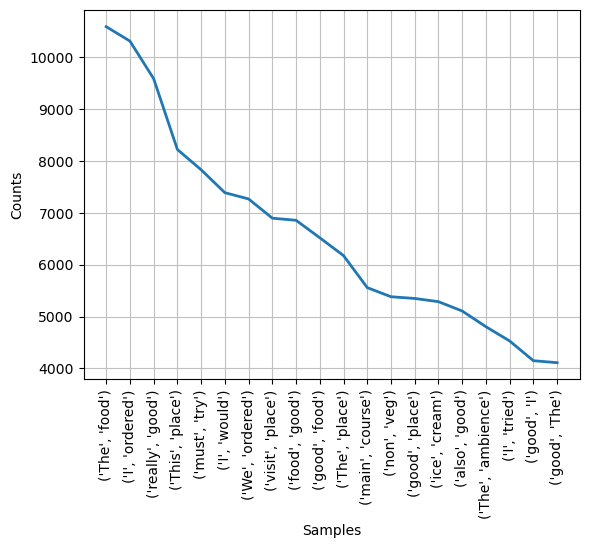

<Axes: xlabel='Samples', ylabel='Counts'>

In [48]:
fd_bigrams.plot(20)

In [49]:
tri_grams = trigrams(total_review_1D)
tri_grams

<generator object trigrams at 0x000002416243B530>

In [50]:
fd_trigram = FreqDist()

In [51]:
for trigram in tri_grams:
    fd_trigram[trigram] += 1

In [52]:
fd_trigram.most_common(20)

[(('veg', 'non', 'veg'), 1529),
 (('must', 'visit', 'place'), 1485),
 (('The', 'food', 'good'), 1341),
 (('place', 'hangout', 'friends'), 1165),
 (('I', 'must', 'say'), 1140),
 (('I', 'visited', 'place'), 1058),
 (('I', 'would', 'recommend'), 1057),
 (('I', 'would', 'say'), 983),
 (('place', 'hang', 'friends'), 967),
 (('food', 'really', 'good'), 889),
 (('nFood', 'nAmbience', 'nService'), 848),
 (('A', 'must', 'visit'), 767),
 (('The', 'ambience', 'good'), 754),
 (('A', 'good', 'place'), 737),
 (('North', 'Indian', 'food'), 678),
 (('I', 'would', 'like'), 625),
 (('nFood', 'nService', 'nAmbience'), 607),
 (('A', 'must', 'try'), 606),
 (('I', 'really', 'liked'), 595),
 (('I', 'ordered', 'chicken'), 588)]

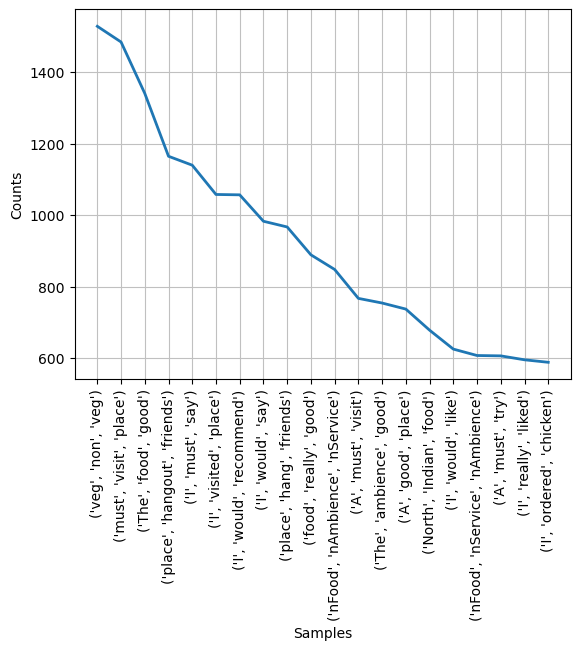

<Axes: xlabel='Samples', ylabel='Counts'>

In [53]:
fd_trigram.plot(20)

### Extracting geographical location

In [54]:
# !pip install geocoder
# !pip install geopy

In [55]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', None, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan

In [56]:
### Adding details to location for specification

df['location'] = df['location'] + ' , Bangalore ,Karnataka ,India'

In [57]:
df['location']

0               Banashankari , Bangalore ,Karnataka ,India
1               Banashankari , Bangalore ,Karnataka ,India
2               Banashankari , Bangalore ,Karnataka ,India
3               Banashankari , Bangalore ,Karnataka ,India
4               Basavanagudi , Bangalore ,Karnataka ,India
                               ...                        
51712             Whitefield , Bangalore ,Karnataka ,India
51713             Whitefield , Bangalore ,Karnataka ,India
51714             Whitefield , Bangalore ,Karnataka ,India
51715    ITPL Main Road, Whitefield , Bangalore ,Karnat...
51716    ITPL Main Road, Whitefield , Bangalore ,Karnat...
Name: location, Length: 51717, dtype: object

In [58]:
df_copy = df.copy()

In [59]:
df_copy['location'].isna().sum()

21

In [60]:
df_copy = df_copy.dropna(subset=['location']) # droping rows with missing values in the location column

In [61]:
df_copy['location'].isna().sum()

0

In [62]:
locations = pd.DataFrame(df_copy['location'].unique())
locations

,0
0,"Banashankari , Bangalore ,Karnataka ,India"
1,"Basavanagudi , Bangalore ,Karnataka ,India"
2,"Mysore Road , Bangalore ,Karnataka ,India"
3,"Jayanagar , Bangalore ,Karnataka ,India"
4,"Kumaraswamy Layout , Bangalore ,Karnataka ,India"
...,...
88,"West Bangalore , Bangalore ,Karnataka ,India"
89,"Magadi Road , Bangalore ,Karnataka ,India"
90,"Yelahanka , Bangalore ,Karnataka ,India"
91,"Sahakara Nagar , Bangalore ,Karnataka ,India"


In [63]:
locations.columns = ['name']

In [64]:
locations

,name
0,"Banashankari , Bangalore ,Karnataka ,India"
1,"Basavanagudi , Bangalore ,Karnataka ,India"
2,"Mysore Road , Bangalore ,Karnataka ,India"
3,"Jayanagar , Bangalore ,Karnataka ,India"
4,"Kumaraswamy Layout , Bangalore ,Karnataka ,India"
...,...
88,"West Bangalore , Bangalore ,Karnataka ,India"
89,"Magadi Road , Bangalore ,Karnataka ,India"
90,"Yelahanka , Bangalore ,Karnataka ,India"
91,"Sahakara Nagar , Bangalore ,Karnataka ,India"


In [65]:
print(locations.iloc[0])

name    Banashankari , Bangalore ,Karnataka ,India
Name: 0, dtype: object


In [66]:
from geopy.geocoders import Nominatim #Nominatim is used to retrieve latitude and longitude

In [67]:
geolocator = Nominatim(user_agent= 'app', timeout=None) # Creating onject for extracting geolocation. user_agent is always reguired and its argument is app

In [68]:
lat = []
lon = []
for location in locations['name']:
    location = geolocator.geocode(location) # Retrieving geo information of location
    if location is None: # If no geographical location information is retrieved
        lat.append(np.nan) # Assing nan to lat if there is geo information retrieved
        lon.append(np.nan)
    else:
        lat.append(location.latitude) # appending the latitude information from the collected geo information
        lon.append(location.longitude)  # appending the longitude information from the collected geo information

In [69]:
locations['longitude'] = lon
locations['latitude'] = lat

In [70]:
locations.head(5)

,name,longitude,latitude
0,"Banashankari , Bangalore ,Karnataka ,India",77.573598,12.915221
1,"Basavanagudi , Bangalore ,Karnataka ,India",77.575502,12.941726
2,"Mysore Road , Bangalore ,Karnataka ,India",77.530090,12.946662
3,"Jayanagar , Bangalore ,Karnataka ,India",77.582423,12.929273
4,"Kumaraswamy Layout , Bangalore ,Karnataka ,India",77.555318,12.908149


In [71]:
locations.isna().sum() # Checking for missing values

name         0
longitude    3
latitude     3
dtype: int64

In [72]:
locations[locations['longitude'].isna()] # Checking for rows with missing longititude values

,name,longitude,latitude
45,"St. Marks Road , Bangalore ,Karnataka ,India",NaN,NaN
79,"Rammurthy Nagar , Bangalore ,Karnataka ,India",NaN,NaN
85,"Sadashiv Nagar , Bangalore ,Karnataka ,India",NaN,NaN


### To fix the missing geographical coordinates of the given locations, we can use a simple google search to archieve that. Simply google "geographical co-ordinates of St. Marks Road , Bangalore ,Karnataka ,India" for example. Select the first link and you will have the coordinates for the given location. Do the same for the remaining locations

In [73]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [74]:
locations['longitude'][45] = 77.6017437
locations['latitude'][45] = 12.9764122  # Replacing nan values of longitude and latitude for row 45 with values from google searching the location

In [75]:
locations['longitude'][79] = 77.6777817
locations['latitude'][79] = 13.0120218 # Replacing nan values of longitude and latitude for row 79

In [76]:
locations['longitude'][85] = 77.580569
locations['latitude'][85] = 13.010316 # Replacing nan values of longitude and latitude for row 85

In [77]:
locations.isna().sum() # Checking for missing values

name         0
longitude    0
latitude     0
dtype: int64

In [78]:
df['cuisines'].isna().sum() # Checking for missing value in df['cuisines']

45

In [79]:
df[df['cuisines'].isna()] # pulling rows with missing cuisines

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
438,438,https://www.zomato.com/bangalore/the-house-of-...,"85, 7th Main Road, Nandakumar Layout, Ramanjan...",The House Of Vadapav,Yes,No,NaN,0,+91 8884563131\r\n+91 9945435158,"Banashankari , Bangalore ,Karnataka ,India",Quick Bites,None,None,150,"[('Rated 5.0', 'RATED\n Good atmosphere ....l...",[],Delivery,Banashankari
440,440,https://www.zomato.com/bangalore/lassi-spot-ku...,"728, 24th Cross, Opposite SBI Bank, 1st Stage,...",Lassi Spot,Yes,No,3.3,4,+91 8050567900,"Kumaraswamy Layout , Bangalore ,Karnataka ,India",Beverage Shop,None,None,100,[],[],Delivery,Banashankari
759,759,https://www.zomato.com/bangalore/the-house-of-...,"85, 7th Main Road, Nandakumar Layout, Ramanjan...",The House Of Vadapav,Yes,No,NaN,0,+91 8884563131\r\r\n+91 9945435158,"Banashankari , Bangalore ,Karnataka ,India",Quick Bites,None,None,150,"[('Rated 5.0', 'RATED\n Good atmosphere ....l...",[],Dine-out,Banashankari
1662,1662,https://www.zomato.com/bangalore/papa-khan-ras...,"6, Abbiah Layout KC Halli Main Road, Bommanaha...",Papa Khan Rasoi,No,No,NaN,0,None,NaN,None,None,None,None,[],[],Delivery,Bannerghatta Road
4037,4037,https://www.zomato.com/bangalore/chai-point-ma...,"77 Town, Building No 3, Divya Shree Building, ...",Chai Point,Yes,No,NaN,0,+91 9738271431,"Marathahalli , Bangalore ,Karnataka ,India","Beverage Shop, Quick Bites",None,None,200,[],[],Delivery,Bellandur
6887,6887,https://www.zomato.com/bangalore/noodle-oodle-...,"V3/1, NGEF, Industrial Estate, Mahadevapura Po...",Noodle Oodle,Yes,No,3.6,9,+91 9945670505,"Whitefield , Bangalore ,Karnataka ,India",Delivery,None,None,400,"[('Rated 4.0', 'RATED\n Lil oily else good'),...","['Chilly Chicken', 'Mixed Veg Noodles', 'Veg S...",Delivery,Brookefield
6897,6897,https://www.zomato.com/bangalore/taste-of-chet...,"V3/1, NGEF, Industrial Estate, Mahadevapura Po...",Taste of Chettinad,Yes,No,NaN,0,+91 9945670505,"Whitefield , Bangalore ,Karnataka ,India",Delivery,None,None,400,"[('Rated 1.0', 'RATED\n Biryani quantity was ...","['Chicken Chetinad', 'Dindigul Chicken Biryani...",Delivery,Brookefield
7277,7277,https://www.zomato.com/bangalore/watheen-nuts-...,"710, Varthur Main Road, Thubarahalli, Whitefie...",Watheen Nuts,No,No,NaN,0,None,"Whitefield , Bangalore ,Karnataka ,India","Takeaway, Delivery",None,None,400,[],[],Delivery,Brookefield
7555,7555,https://www.zomato.com/bangalore/delhi-food-fa...,"150, 10th Cross, Green Garden Layout, Sai Baba...",Delhi Food Factory,Yes,No,NaN,0,+91 7065797900,"Marathahalli , Bangalore ,Karnataka ,India",Delivery,None,None,500,[],"['Butter Chicken', 'Factory Wala Kadhai Paneer...",Delivery,Brookefield
9874,9874,https://www.zomato.com/bangalore/papa-khan-ras...,"6, Abbiah Layout KC Halli Main Road, Bommanaha...",Papa Khan Rasoi,No,No,NaN,0,None,NaN,None,None,None,None,[],[],Delivery,BTM


In [80]:
df = df.dropna(subset=['cuisines']) # Dropping rows with missing cuisines values in df

In [81]:
df['cuisines'].isna().sum() # Checking for missing cuisines in north_india

0

In [82]:
north_india = df[df['cuisines'].str.contains('North Indian')] # Selecting only rows that contain north indian in the cuisines column
north_india

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,"Banashankari , Bangalore ,Karnataka ,India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,"Banashankari , Bangalore ,Karnataka ,India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,"Banashankari , Bangalore ,Karnataka ,India",Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,"Basavanagudi , Bangalore ,Karnataka ,India",Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8,286,+91 9980040002\r\n+91 9980063005,"Basavanagudi , Bangalore ,Karnataka ,India",Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51706,51706,https://www.zomato.com/bangalore/red-glow-whit...,"Poornima Complex, Dodsworth Layout, Whitefield...",Red Glow,No,No,3.7,27,+91 9740571131,"Whitefield , Bangalore ,Karnataka ,India",Pub,None,"North Indian, Continental","1,200","[('Rated 5.0', 'RATED\n Excellent place had n...",[],Pubs and bars,Whitefield
51708,51708,https://www.zomato.com/bangalore/keys-cafe-key...,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,No,No,2.8,161,080 39451000\n+91 8884038484,"Whitefield , Bangalore ,Karnataka ,India","Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian","1,200","[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars,Whitefield
51709,51709,https://www.zomato.com/bangalore/the-farm-hous...,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,No,No,3.7,34,+91 9980121279\n+91 9900240646,"Whitefield , Bangalore ,Karnataka ,India","Casual Dining, Bar",None,"North Indian, Continental",800,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield
51711,51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5,81,080 65951222,"Whitefield , Bangalore ,Karnataka ,India","Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield


In [83]:
north_india_res_count = north_india['location'].value_counts().reset_index().rename(columns = {'index':'name', 'location':'count'}) # Using value_counts() for frequency and reset_index() for creating a dataframe like object
north_india_res_count

,name,count
0,"BTM , Bangalore ,Karnataka ,India",2469
1,"HSR , Bangalore ,Karnataka ,India",1123
2,"Whitefield , Bangalore ,Karnataka ,India",1059
3,"Marathahalli , Bangalore ,Karnataka ,India",1038
4,"JP Nagar , Bangalore ,Karnataka ,India",958
...,...,...
85,"Hebbal , Bangalore ,Karnataka ,India",4
86,"Jakkur , Bangalore ,Karnataka ,India",3
87,"Central Bangalore , Bangalore ,Karnataka ,India",2
88,"West Bangalore , Bangalore ,Karnataka ,India",1


In [84]:
heatmap_df = north_india_res_count.merge(locations, on = 'name', how = 'left') # Including columns in the right dataframe that are not in the left datafram using a common feature or column(s) in both df's
heatmap_df                                                                     # In other words, maintain left table and add all columns that are in the right table but are not in the left table

,name,count,longitude,latitude
0,"BTM , Bangalore ,Karnataka ,India",2469,77.604565,12.911276
1,"HSR , Bangalore ,Karnataka ,India",1123,77.638862,12.911623
2,"Whitefield , Bangalore ,Karnataka ,India",1059,77.749745,12.969637
3,"Marathahalli , Bangalore ,Karnataka ,India",1038,77.698416,12.955257
4,"JP Nagar , Bangalore ,Karnataka ,India",958,77.579393,12.912076
...,...,...,...,...
85,"Hebbal , Bangalore ,Karnataka ,India",4,77.591900,13.038218
86,"Jakkur , Bangalore ,Karnataka ,India",3,77.606894,13.078474
87,"Central Bangalore , Bangalore ,Karnataka ,India",2,77.554801,13.010129
88,"West Bangalore , Bangalore ,Karnataka ,India",1,77.567183,13.022235


In [85]:
#!pip install folium

In [86]:
import folium # folium is used for creating maps and other objects

In [87]:
basemap = folium.Map()  # Initializing the Map method for creating a globe in folium
basemap

In [88]:
from folium.plugins import HeatMap # Importing heatmap from folium

In [89]:
HeatMap(heatmap_df[['latitude', 'longitude', 'count']]).add_to(basemap) # Adding heatmap to the base map. basemap is like a canvas you add objects on top of it

In [90]:
basemap # Calling basemap to display the heatmap

#### Automating the process

In [91]:
def get_heatmap(cussine):
    cussines_df = df[df['cuisines'].str.contains(cussine)]
    cussines_df_count = cussines_df['location'].value_counts().reset_index().rename(columns = {'index':'name', 'location':'count'}) # Using value_counts() for frequency and reset_index() for creating a dataframe like object
    heatmap_df = cussines_df_count.merge(locations, on = 'name', how = 'left')
    basemap = folium.Map()
    HeatMap(heatmap_df[['latitude', 'longitude', 'count']]).add_to(basemap) # Adding heatmap to the base map. basemap is like a canvas you add objects on top of it
    heatmap_df.head(5)
    return basemap


In [92]:
get_heatmap('Thai')